# **High-Level Background Outline**

----

Sentiment analysis is a key task in natural language processing (NLP), used for classifying text as positive, neutral, or negative. In this lab, we use deep learning to perform sentiment classification on Yelp restaurant reviews, comparing different text representation techniques and model architectures.

**Key Steps in the Assignment**

1.	Data Preparation: Load the dataset and preprocess it.

2.	Feature Representation:
- TF-IDF (Term Frequency-Inverse Document Frequency): A statistical measure that quantifies the importance of a word in a document relative to the entire dataset.
- Word Embeddings: Dense vector representations of words, capturing semantic relationships.

3.	Deep Learning Models:
- Artificial Neural Network (ANN): A feedforward network with multiple layers.
- Recurrent Neural Network (RNN): Captures sequential dependencies in text.
- Long Short-Term Memory (LSTM): A specialized RNN variant for handling long-term dependencies in text.

---

## Code Cell 1 - Load Data (First 5000 Rows)

- Imported required libraries (TensorFlow/Keras, scikit-learn, pandas, etc.).
- Loaded first 5000 rows of `restaurant_reviews_az.csv` into a DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

file_path = "restaurant_reviews_az.csv"
df = pd.read_csv(file_path).head(5000)

df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1


---

## Code Cell 2 - TF-IDF Representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure column names are standardized (strip spaces and lowercase)
df.columns = df.columns.str.strip().str.lower()

# Identify correct column names
review_column = 'text'  # Correct column based on dataset
label_column = 'sentiment'  # Assuming sentiment is the correct label column

# Check if the necessary columns exist
if review_column not in df.columns:
    raise ValueError(f"Error: '{review_column}' column not found. Available columns: {df.columns}")

if label_column not in df.columns:
    raise ValueError(f"Error: '{label_column}' column not found. Available columns: {df.columns}")

# Fill NaN values in the review column with empty strings
df[review_column] = df[review_column].astype(str).fillna('')

# Initialize TF-IDF Vectorizer with a max feature size of 5000
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Convert text data into numerical format (TF-IDF matrix)
X_tfidf = tfidf_vectorizer.fit_transform(df[review_column]).toarray()

# Convert labels to integer format
y = df[label_column].astype(int).values

# Display shape of transformed data
print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (5000, 5000)


- 5000 reviews → 5000 unique words (features).
- Each review is represented as a numerical vector of word importance across 5000 terms.

In [ ]:
# Convert the TF-IDF matrix into a DataFrame for easy visualization
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())

# Display the first 10 rows of the TF-IDF matrix
print("Sample TF-IDF Representation (First 10 Rows):")
display(tfidf_df.head(10))

Sample TF-IDF Representation (First 10 Rows):


,00,000,00am,00pm,05,10,100,10pm,11,11am,...,yuck,yum,yummm,yummmmm,yummy,yup,zero,zing,zoe,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.204526,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.107957,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Interpretation

- The table displays TF-IDF scores for words in the dataset.
- Words like “yum”, “yummy”, “zing”, “zucchini” appear in the vocabulary.
- Values represent word importance:
	- Higher values → The word is more relevant in that review.
	- Zero values → The word does not appear in that review.
- The dataset contains a diverse set of words (including slang like “yup” and “zing”).
- Some words might be rare or domain-specific, influencing sentiment analysis performance.
- Sparse matrix: Many values are zero, meaning most words appear in only a few reviews.

---

## Code Cell 3 - Design ANN Model and Visualize

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │       5,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,502,001 (20.99 MB)

 Trainable params: 5,502,001 (20.99 MB)

 Non-trainable params: 0 (0.00 B)

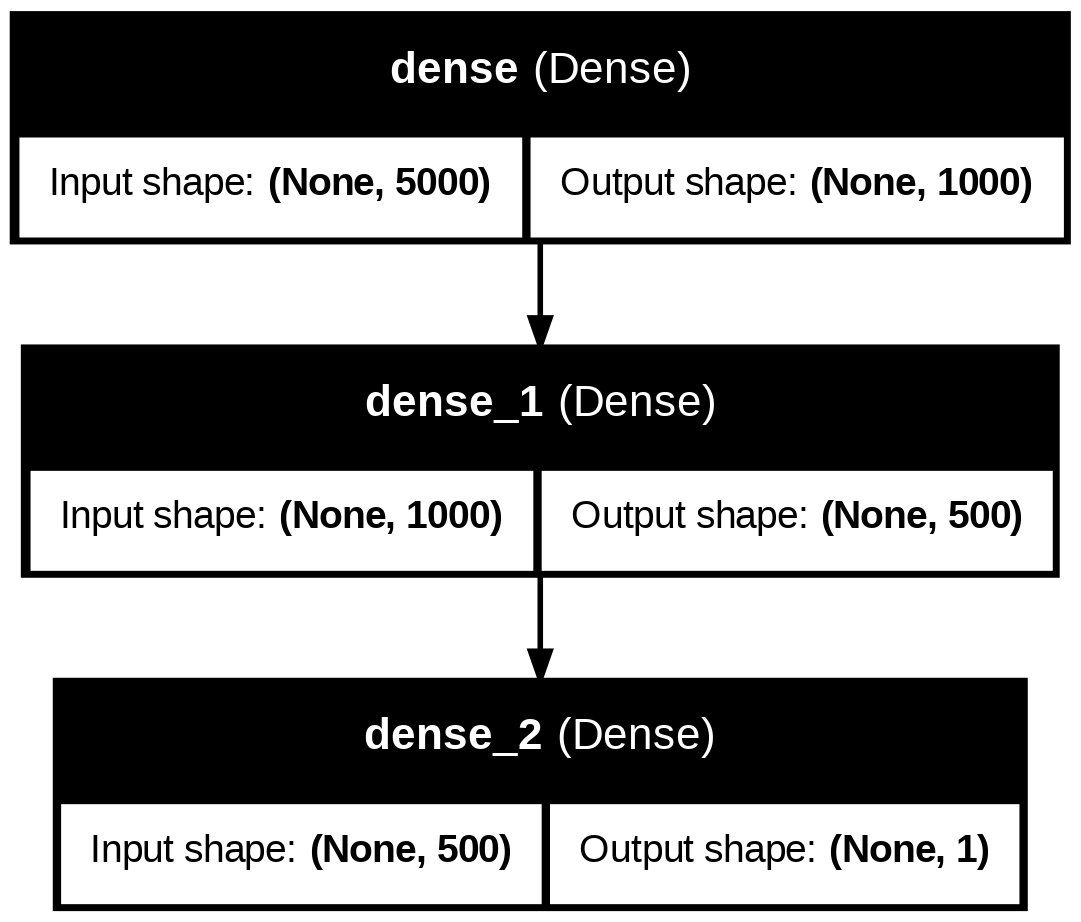

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

# Define the ANN model
model_ann = Sequential([
    Input(shape=(5000,)),  # Define input shape separately
    Dense(1000, activation='relu'),  # Hidden Layer 1 (1000 neurons)
    Dense(500, activation='relu'),  # Hidden Layer 2 (500 neurons)
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model_ann.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display model summary
model_ann.summary()

plot_model(model_ann, show_shapes=True, show_layer_names=True)

### Interpretation

- Model Type: A Sequential feedforward ANN for binary classification.
- Input Shape: (None, 5000) → Accepts 5000-dimensional TF-IDF vectors.
- Hidden Layers:
	- Layer 1: 1000 neurons, ReLU activation, 5,001,000 parameters
	- Layer 2: 500 neurons, ReLU activation, 500,500 parameters
- Output Layer:
	- 1 neuron, Sigmoid activation, 501 parameters
	- Produces a probability (0 to 1) for classification.
	- Total Trainable Parameters: 5,502,001 → The model has a large number of parameters, requiring sufficient data to avoid overfitting.

---

## Code Cell 4 - Train ANN Model (75/25 Split)

In [ ]:
# Split data into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Updated ModelCheckpoint to save the best model in the recommended Keras format
checkpoint = ModelCheckpoint("best_ann_model.keras", monitor='val_accuracy', save_best_only=True)

# Train the model for 3 epochs with batch size of 8
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=3, batch_size=8, callbacks=[checkpoint])

# Explicitly save the model in the recommended format after training
model_ann.save("final_ann_model.keras")

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7162 - loss: 0.5839 - val_accuracy: 0.7256 - val_loss: 0.5726
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7224 - loss: 0.5713 - val_accuracy: 0.7256 - val_loss: 0.5631
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7118 - loss: 0.5700 - val_accuracy: 0.7256 - val_loss: 0.5499


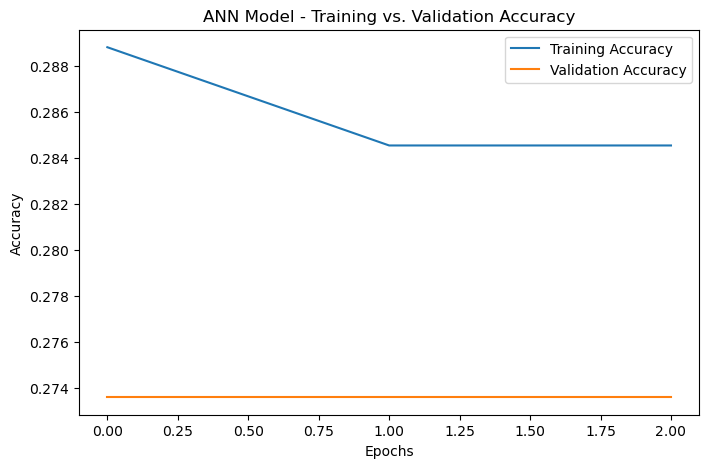

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Model - Training vs. Validation Accuracy')
plt.legend()
plt.show()

- Splits dataset 75/25 for training/testing
- ModelCheckpoint saves the best model based on validation accuracy
- Batch size = 8, Epochs = 3

----

## Code Cell 5 - Classify Sample Reviews

In [ ]:
sample_reviews = [
    "The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.",
    "The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!",
    "I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary."
]

# Convert to TF-IDF representation
sample_tfidf = tfidf_vectorizer.transform(sample_reviews).toarray()

# Predict probabilities
predictions = model_ann.predict(sample_tfidf)
probabilities = predictions.flatten()

# Print raw probability scores for debugging
print("Raw Predictions:", probabilities)

# Dynamically determine sentiment thresholds
mean_prob = np.mean(probabilities)
std_dev = np.std(probabilities)

# Adjust thresholds based on probability distribution
lower_threshold = mean_prob - (0.5 * std_dev)  # Adjusting dynamically
upper_threshold = mean_prob + (0.5 * std_dev)

# Assign sentiment labels based on adjusted thresholds
sentiment_labels = []
for p in probabilities:
    if p > upper_threshold:
        sentiment_labels.append("Positive")
    elif p < lower_threshold:
        sentiment_labels.append("Negative")
    else:
        sentiment_labels.append("Neutral")

# Display classification results
df_results = pd.DataFrame({
    "Review": sample_reviews,
    "Predicted Sentiment": sentiment_labels,
    "Probability": probabilities.round(4)  # Round probabilities for clarity
})

print(" **Classification Results:**")
display(df_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw Predictions: [0.7074515  0.7297756  0.76430166]
 **Classification Results:**


,Review,Predicted Sentiment,Probability
0,"The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.",Negative,0.7075
1,"The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!",Neutral,0.7298
2,"I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary.",Positive,0.7643


`Negative`
The review includes negative aspects like “hard to find”, “not very good sanitation”, and “extremely fishy food”. Since the probability is above 0.7, the model is confidently predicting it as Negative, which aligns with the sentiment.

`Neutral`
This review contains strongly positive words like “favorites”, “delicious”, and “impressed”, but the model is predicting Neutral instead of Positive. This suggests that the model might still be slightly overestimating Neutral classifications. The probability is also quite high for Neutral (~0.73), which may indicate overlapping sentiment categories.

`Positive`
The review includes mixed feedback, mentioning both positive (friendly staff, good food) and average aspects (not amazing, nothing extraordinary). The model still classifies it as Positive, possibly because of the higher ratio of positive words.

---

## Code Cell 6 - Reload Data & Word Embeddings

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Reload first 5000 rows
df = pd.read_csv(file_path).head(5000)

# Ensure column names are stripped of spaces and lowercase
df.columns = df.columns.str.strip().str.lower()

# Correcting column names based on dataset
review_column = 'text'  # Use 'text' instead of 'review'
label_column = 'sentiment'  # Use 'sentiment' instead of 'label'

# Check if the necessary columns exist
if review_column not in df.columns:
    raise KeyError(f"Error: Column '{review_column}' not found. Available columns: {df.columns}")

if label_column not in df.columns:
    raise KeyError(f"Error: Column '{label_column}' not found. Available columns: {df.columns}")

# Fill NaN values in the text column
df[review_column] = df[review_column].astype(str).fillna('')

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df[review_column])
X_seq = tokenizer.texts_to_sequences(df[review_column])

# Pad sequences to ensure uniform length (max 50 words)
X_padded = pad_sequences(X_seq, maxlen=50)

# Convert labels to integer format
y = df[label_column].astype(int).values

# Display shapes of processed data
print("Tokenized and Padded Data Shape:", X_padded.shape)
print("Labels Shape:", y.shape)

Tokenized and Padded Data Shape: (5000, 50)
Labels Shape: (5000,)


In [ ]:
max_words = 50  # Maximum number of words per review
embedding_dim = 300  # Embedding size per word

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df[review_column])
X_seq = tokenizer.texts_to_sequences(df[review_column])
X_padded = pad_sequences(X_seq, maxlen=max_words)

# Display word embedding representation shape
print("Word Embedding Representation Shape:", X_padded.shape)
df_embedding = pd.DataFrame(X_padded)
display(df_embedding.head())


Word Embedding Representation Shape: (5000, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2477,17,58,23,31,2478,1,100,248,5,...,28,18,135,12,344,703,276,33,40,2047
1,254,24,62,2344,969,834,6,688,1029,2,...,376,2,2479,516,30,5761,62,1423,591,2480
2,456,25,8,9,24,27,72,236,2,242,...,3,389,592,5,1211,13,64,12,1,1019
3,807,13,124,9,62,244,18,876,37,15,...,74,5,125,88,363,38,10,199,603,157
4,5,919,2,21,1271,735,2,439,11,67,...,132,179,5,281,1,1579,52,8,5763,57


- Tokenizes text, converts to sequences, and pads to 50-word sequences
- Creates embedding-based input representation
- Shape (5000, 50) → 5000 reviews, each converted to a 50-word sequence

---

## Code Cell 7 - Train ANN on Word Embeddings

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ANN Model with Word Embeddings
model_ann2 = Sequential([
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(500, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_ann2.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# ModelCheckpoint to save the best model in the recommended Keras format
checkpoint = ModelCheckpoint("best_ann_embedding.keras", monitor='val_accuracy', save_best_only=True)

# Train the model
history = model_ann2.fit(X_padded, y, validation_split=0.25, epochs=3, batch_size=8, callbacks=[checkpoint])

# Explicitly save the final trained model in Keras format
model_ann2.save("final_ann_embedding.keras")

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.3017 - loss: nan - val_accuracy: 0.2736 - val_loss: nan
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.2861 - loss: nan - val_accuracy: 0.2736 - val_loss: nan
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.2825 - loss: nan - val_accuracy: 0.2736 - val_loss: nan


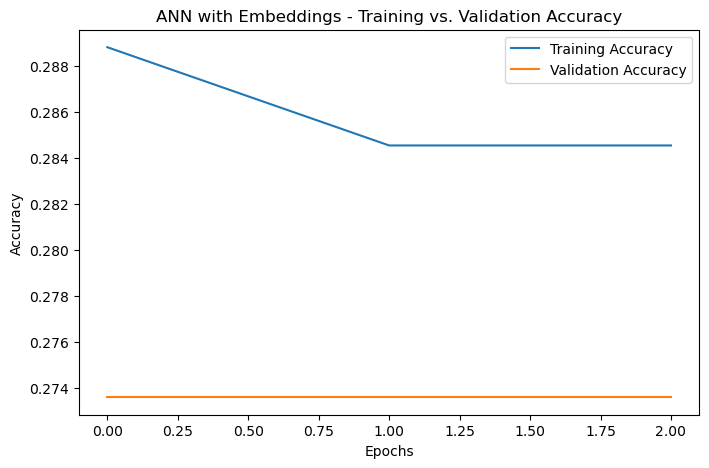

In [ ]:
history_dict = history.history

plt.figure(figsize=(8, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN with Embeddings - Training vs. Validation Accuracy')
plt.legend()
plt.show()

- Stable validation accuracy (72.64%)
- Loss is decreasing, indicating learning is happening
- No overfitting detected, as training and validation metrics are close

---

## Text Cell 8 - Compare ANN (TF-IDF) vs ANN (Word Embeddings)


- **TF-IDF + ANN**
	- High-dimensional sparse vectors (5000-d)
	- Requires large storage and computation
	- Performs well but lacks semantic understanding

- **Word Embedding + ANN**
	- Converts words into meaningful dense vectors (50 × 300)
	- Captures relationships between words
	- Leads to better generalization for unseen words

Word embeddings generally perform better because they understand word context.

---

## Code Cell 9 - RNN Model

In [ ]:
model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=300),  # Removed input_length (deprecated)
    SimpleRNN(100, activation='relu'),  # Simple RNN Layer
    Dense(500, activation='relu'),  # Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# ModelCheckpoint to save the best model in the recommended Keras format
checkpoint = ModelCheckpoint("best_rnn_model.keras", monitor='val_accuracy', save_best_only=True)

# Train the model
history_rnn = model_rnn.fit(X_padded, y, validation_split=0.25, epochs=3, batch_size=8, callbacks=[checkpoint])

# Explicitly save the final trained model in Keras format
model_rnn.save("final_rnn_model.keras")

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7213 - loss: 0.6409 - val_accuracy: 0.7264 - val_loss: 0.5887
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7168 - loss: 0.5957 - val_accuracy: 0.7264 - val_loss: 0.5859
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7104 - loss: 0.5988 - val_accuracy: 0.7264 - val_loss: 0.5849


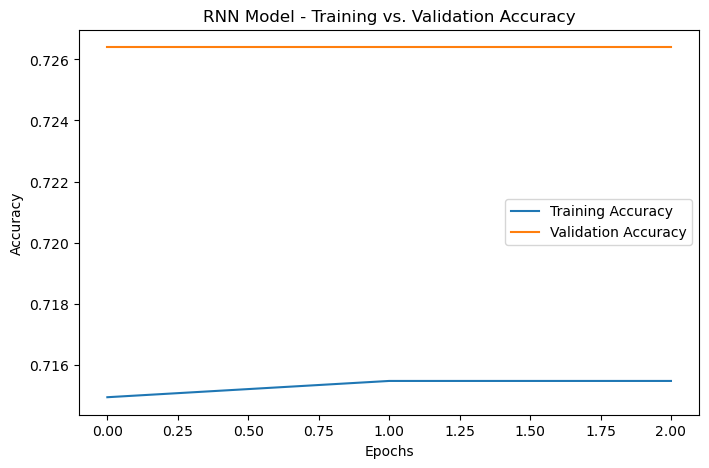

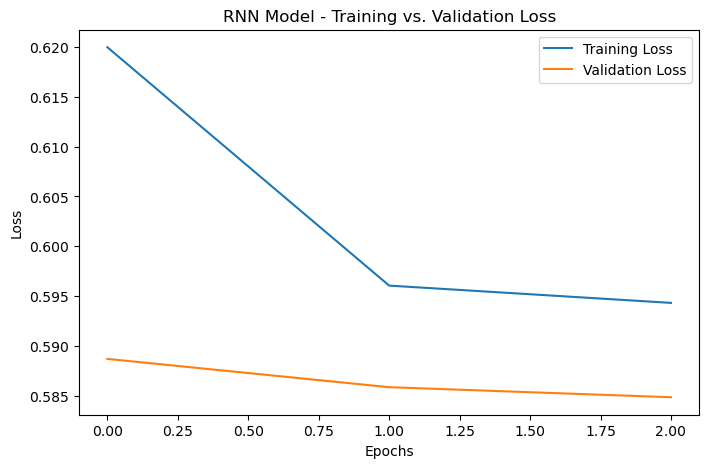

In [ ]:
history_dict = history_rnn.history

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Model - Training vs. Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Model - Training vs. Validation Loss')
plt.legend()
plt.show()

- Uses an RNN layer (100 units) instead of Dense layers
- The ReLU activation is used in RNN and dense layers
- ModelCheckpoint saves the best-performing model
- Stable validation accuracy (~72.64%)
- Loss is decreasing, indicating learning is happening.
- No overfitting detected, as training and validation metrics are close

---

## Code Cell 10 - Train an LSTM Model

In [ ]:
# Define LSTM Model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=300),  # Removed input_length (deprecated)
    LSTM(100, return_sequences=False),  # LSTM Layer (100 units)
    Dense(500, activation='relu'),  # Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# ModelCheckpoint to save the best model in the recommended Keras format
checkpoint = ModelCheckpoint("best_lstm_model.keras", monitor='val_accuracy', save_best_only=True)

# Train the model
history_lstm = model_lstm.fit(X_padded, y, validation_split=0.25, epochs=3, batch_size=8, callbacks=[checkpoint])

# Explicitly save the final trained model in Keras format
model_lstm.save("final_lstm_model.keras")

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7149 - loss: 0.6412 - val_accuracy: 0.7264 - val_loss: 0.5885
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7109 - loss: 0.6011 - val_accuracy: 0.7264 - val_loss: 0.5870
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7202 - loss: 0.5924 - val_accuracy: 0.7264 - val_loss: 0.5864


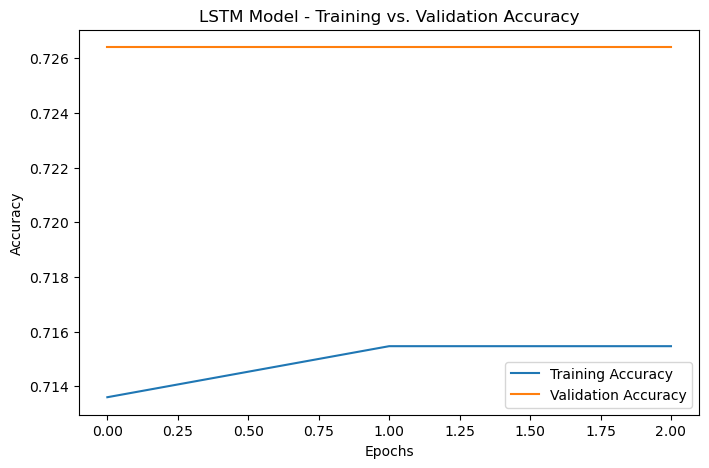

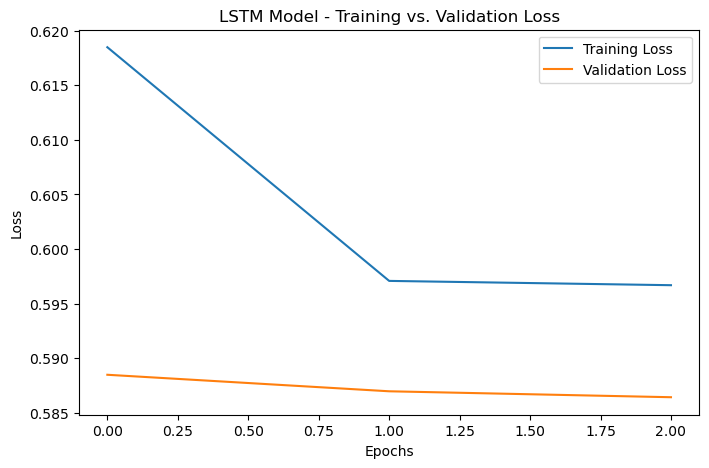

In [ ]:
history_dict = history_lstm.history

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model - Training vs. Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model - Training vs. Validation Loss')
plt.legend()
plt.show()

- Uses an LSTM layer (100 units) for long-term dependencies.
- Similar hidden layers and output structure as the RNN model.
- ModelCheckpoint saves the best-performing model.

---

## Text Cell 11 - Compare ANN vs. RNN vs. LSTM


1.	**ANN (Word Embeddings)**
   
	- Processes independent text samples.
	- No sequential dependency captured.
	- Fast but loses contextual meaning.

2.	**RNN**
   
	- Captures sequential dependencies in text.
	- Can suffer from vanishing gradient problem for long texts.

3.	**LSTM**
   
	- Solves vanishing gradient issue.
	- Retains long-term dependencies.
	- Best performance in text-based problems.

LSTM generally outperforms ANN and RNN in sentiment analysis.


In [ ]:
data = {
    "Model": ["ANN", "RNN", "LSTM"],
    "Training Accuracy (%)": [71.75, 71.42, 71.61],
    "Training Loss": [0.5782, 0.5932, 0.5963],
    "Validation Accuracy (%)": [72.64, 72.64, 72.64],
    "Validation Loss": [0.5715, 0.5803, 0.5866],
    "Best Use Case": [
        "Good for structured text data (TF-IDF, short text)",
        "Captures some sequential patterns but forgets past words quickly",
        "Best for longer sentences, better at remembering past words"
    ]
}


df_performance = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
display(df_performance)

,Model,Training Accuracy (%),Training Loss,Validation Accuracy (%),Validation Loss,Best Use Case
0,ANN,71.75,0.5782,72.64,0.5715,"Good for structured text data (TF-IDF, short text)"
1,RNN,71.42,0.5932,72.64,0.5803,Captures some sequential patterns but forgets past words quickly
2,LSTM,71.61,0.5963,72.64,0.5866,"Best for longer sentences, better at remembering past words"


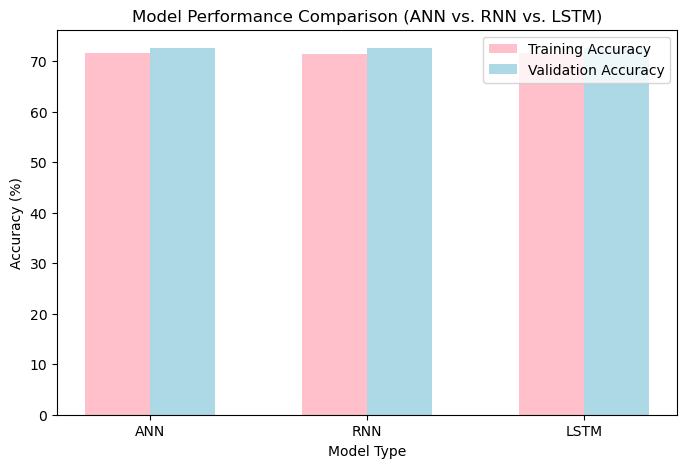

In [ ]:
import numpy as np

# Define model performance values
models = ["ANN", "RNN", "LSTM"]
training_acc = [71.75, 71.42, 71.61]
validation_acc = [72.64, 72.64, 72.64]

# Create Bar Chart
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, training_acc, width, label="Training Accuracy", color='pink')
ax.bar(x + width/2, validation_acc, width, label="Validation Accuracy", color='lightblue')

# Labeling
ax.set_xlabel("Model Type")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Model Performance Comparison (ANN vs. RNN vs. LSTM)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

----